# Computer Question 2

In following, I have provided the chat between myself and ChatGPT for this question:


*modify code and plot r for each dimension, put doc strings and comments:*

<img src="Q2.png" width="500px">


The output is the following code:

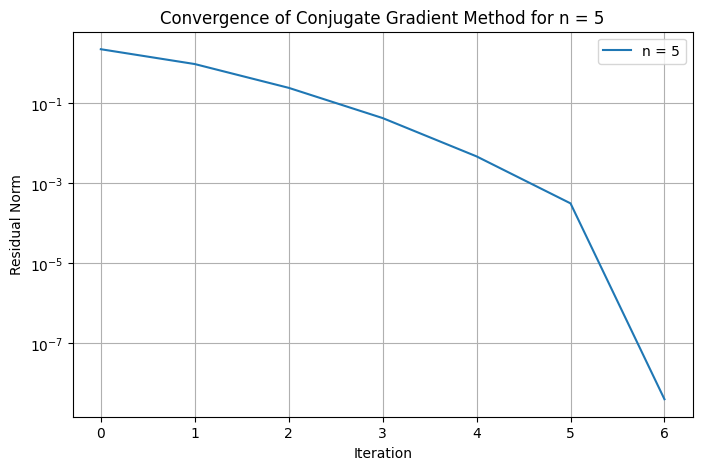

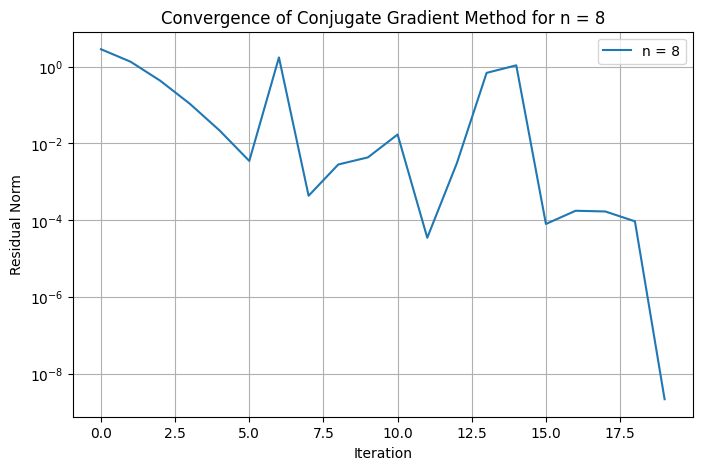

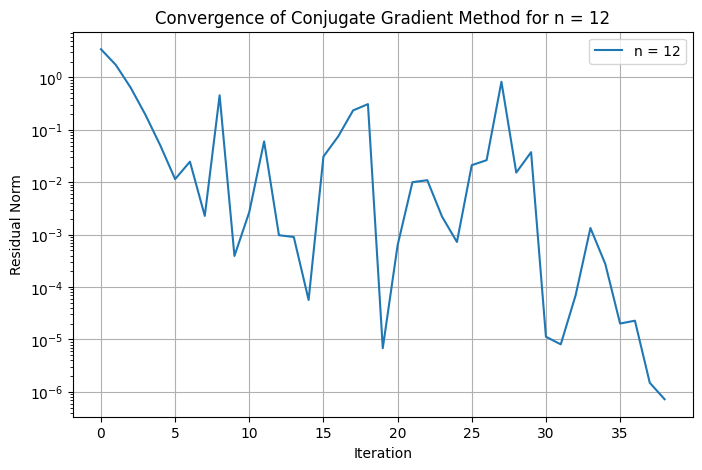

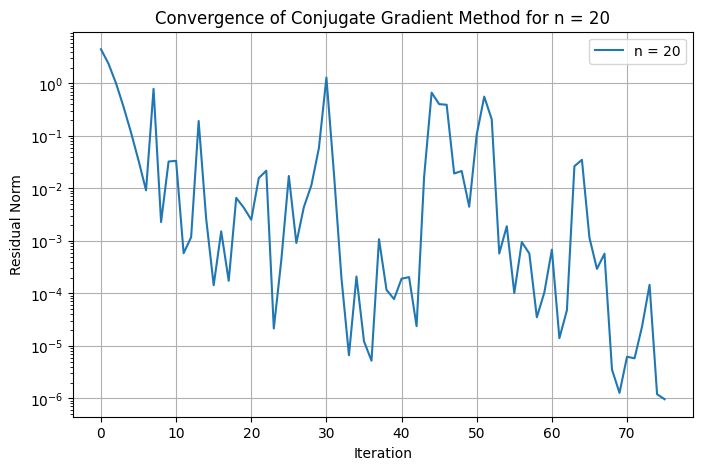

Number of iterations for convergence:
Dimension n = 5: 5 iterations
Dimension n = 8: 18 iterations
Dimension n = 12: 37 iterations
Dimension n = 20: 74 iterations


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def conjugate_gradient(A, b, x0, tol=1e-6):
    """
    Solve the linear system Ax = b using the Conjugate Gradient method.

    Parameters:
    A (ndarray): Symmetric positive-definite matrix.
    b (ndarray): Right-hand side vector.
    x0 (ndarray): Initial guess for the solution.
    tol (float): Tolerance for convergence.

    Returns:
    x (ndarray): Approximate solution vector.
    num_iterations (int): Number of iterations performed.
    residuals (list): Residuals at each iteration.
    """
    x = x0
    r = b - np.dot(A, x)  # Initial residual
    p = r.copy()          # Initial direction
    residuals = [np.linalg.norm(r)]  # Store initial residual norm
    num_iterations = 0

    while np.linalg.norm(r) > tol:
        Ap = np.dot(A, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_new = r - alpha * Ap
        residuals.append(np.linalg.norm(r_new))  # Store residual norm

        if np.linalg.norm(r_new) < tol:
            break

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        num_iterations += 1

    return x, num_iterations, residuals


def create_A_matrix(n):
    """
    Create a symmetric positive-definite matrix of size n x n.

    Parameters:
    n (int): Dimension of the matrix.

    Returns:
    A (ndarray): Symmetric positive-definite matrix.
    """
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i, j] = 1 / (i + j + 1)
    return A

# Define problem dimensions and tolerance
dimensions = [5, 8, 12, 20]
tolerance = 1e-6

# Store results for each dimension
results = {}

for n in dimensions:
    # Generate problem data
    A = create_A_matrix(n)
    b = np.ones(n)
    x0 = np.zeros(n)

    # Solve using Conjugate Gradient
    _, iterations, residuals = conjugate_gradient(A, b, x0, tol=tolerance)

    # Store number of iterations
    results[n] = iterations

    # Plot residuals for the current dimension
    plt.figure(figsize=(8, 5))
    plt.plot(residuals, label=f"n = {n}")
    plt.title(f"Convergence of Conjugate Gradient Method for n = {n}")
    plt.xlabel("Iteration")
    plt.ylabel("Residual Norm")
    plt.yscale("log")
    plt.legend()
    plt.grid()
    plt.show()

# Print number of iterations for each dimension
print("Number of iterations for convergence:")
for n, iters in results.items():
    print(f"Dimension n = {n}: {iters} iterations")
